# Modelo de Regresión Logística: Bullying

**Autor:** Erick Maximiliano González Alvarado  

# Modelo de Regresión Logística para la Detección de Bullying

Este notebook tiene como objetivo desarrollar y evaluar un modelo de regresión logística para predecir si un estudiante ha sufrido bullying o no, a partir de variables categóricas relacionadas con su entorno escolar, social y familiar.

In [ ]:
# Manipulación de datos
import pandas as pd

# Cálculo numérico eficiente
import numpy as np

# Pruebas de hipótesis y análisis estadístico (Chi² de independencia)
import scipy.stats as ss

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de clasificación
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

# División del dataset
from sklearn.model_selection import train_test_split  # Train/Test Split


# Carga y exploración inicial del dataset

## Descripción de las columnas del dataset

El dataset proviene de la encuesta Global School-Based Student Health Survey (GSHS) aplicada en Argentina (2018), enfocada en indicadores de salud y factores de riesgo en jóvenes estudiantes.  
De esta encuesta se seleccionaron variables relacionadas con el bullying y factores asociados.

| Column Name                                | Description                                                                 |
|--------------------------------------------|-----------------------------------------------------------------------------|
| Bullied_on_school_property                 | Si el estudiante fue víctima de bullying en la escuela en los últimos 12 meses (Yes/No). |
| Bullied_not_on_school_property             | Si el estudiante fue víctima de bullying fuera de la escuela en los últimos 12 meses (Yes/No). |
| Cyber_bullied_past_12_months               | Si el estudiante fue víctima de ciberacoso en los últimos 12 meses (Yes/No). |
| Custom_Age                                 | Edad reportada del estudiante |
| Sex                                        | Sexo del estudiante (Male/Female). |
| Physically_attacked                        | Número de veces que el estudiante fue atacado físicamente en los últimos 12 meses. |
| Physical_fighting                          | Número de veces que el estudiante participó en peleas físicas en los últimos 12 meses. |
| Felt_lonely                                | Frecuencia con la que el estudiante se sintió solo (Never, Rarely, Sometimes, Most of the time, Always). |
| Close_friends                              | Número de amigos cercanos (0, 1, 2, 3 o más). |
| Miss_school_no_permission                  | Días que faltó a la escuela sin permiso en los últimos 30 días. |
| Other_students_kind_helpful                | Percepción de si otros estudiantes son amables y serviciales (Never, Rarely, Sometimes, Most of the time, Always). |
| Parents_understand_problems                | Frecuencia con la que los padres entienden los problemas del estudiante (Never, Rarely, Sometimes, Most of the time, Always). |
| Lonely_most_of_time_or_always              | Si el estudiante reporta sentirse solo “la mayoría del tiempo” o “siempre” (Yes/No). |
| Missed_classes_without_permission          | Si el estudiante reporta haber faltado a clases sin permiso (Yes/No). |
| Were_underweight                           | Auto-percepción de estar bajo de peso (Yes/No). |
| Were_overweight                            | Auto-percepción de estar con sobrepeso (Yes/No). |
| Were_obese                                 | Auto-percepción de obesidad (Yes/No). |

---



## Carga y exploración inicial del dataset

En esta sección se carga el dataset. El archivo está en formato CSV y se encuentra separado por punto y coma (;).  

In [ ]:
df = pd.read_csv("Bullying_2018.csv", sep=";")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [ ]:
df.head(20)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


# Creación de la variable objetivo: *Bullied*

Para entrenar el modelo de regresión logística es necesario definir una variable objetivo binaria que indique si un estudiante ha sido víctima de bullying.  

En este caso, se construyó la variable *Bullied* a partir de tres indicadores disponibles en la encuesta:

- Bullied_on_school_property_in_past_12_months
- Bullied_not_on_school_property_in_past_12_months
- Cyber_bullied_in_past_12_months  

La lógica aplicada es la siguiente:
- Si al menos uno de estos tres indicadores es *"Yes"*, entonces *Bullied = Yes*.  
- Si los tres son "No", entonces *Bullied = No*.  

Esto permite concentrar la información de bullying en un único campo, que será la variable a predecir en el modelo.


In [ ]:
df["Bullied"] = df[["Bullied_on_school_property_in_past_12_months",
                    "Bullied_not_on_school_property_in_past_12_months",
                    "Cyber_bullied_in_past_12_months"
                  ]].eq("Yes").any(axis=1).map({True: "Yes", False: "No"})
print(df.shape)
df.head()


(56981, 19)


,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,Bullied
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,,Yes
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,,No
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,,No


In [ ]:
variables_categoricas = [
    "Custom_Age",
    "Sex",
    "Physically_attacked",
    "Physical_fighting",
    "Felt_lonely",
    "Close_friends",
    "Miss_school_no_permission",
    "Other_students_kind_and_helpful",
    "Parents_understand_problems",
    "Most_of_the_time_or_always_felt_lonely",
    "Missed_classes_or_school_without_permission",
    "Were_underweight",
    "Were_overweight",
    "Were_obese",
]


# Evaluación de la relación entre las variables categóricas y la variable objetivo

Con el fin de evaluar la relación entre la variable objetivo *Bullied* y el resto de variables categóricas del dataset, se implementó una función auxiliar denominada tabla_contingencia.

Esta función realiza la construcción de tablas de contingencia, aplicacion de prueba Chi², así como otras métricas. Así mismo, la función retorna las tablas de contingencia normalizadas tanto por filas cómo por columnas, fácilitando la creación de *heatmaps* (mapas de calor).

In [ ]:
def tabla_contingencia(df, target, variables):
    resultados = []
    tablas_contingencia = []
    tablas_normalizadas_filas = []
    tablas_normalizadas_columnas = []

    for var in variables:
        # Tabla de contingencia
        tabla = pd.crosstab(df[var], df[target])
        tablas_contingencia.append(tabla)

        # Tabla normalizada por filas (porcentajes por fila)
        tabla_normalizada_filas = pd.crosstab(df[var], df[target], normalize='index') * 100
        tablas_normalizadas_filas.append(tabla_normalizada_filas)

        # Tabla normalizada por columnas (porcentajes por columna)
        tabla_normalizada_columnas = pd.crosstab(df[var], df[target], normalize='columns') * 100
        tablas_normalizadas_columnas.append(tabla_normalizada_columnas)

        # Prueba Chi²
        chi2, p, dof, expected = ss.chi2_contingency(tabla)

        print(f"\nVariable: {var}")
        print("Tabla de contingencia:")
        display(tabla)

        print("\nResultados Chi²:")
        print(f"Chi² = {chi2:.2f}, p-valor = {p:.4f}, gl = {dof}")

        resultados.append({
            "Variable": var,
            "Chi2": chi2,
            "p-valor": p,
            "gl": dof,
            "Tabla": tabla,
            "Tabla_Normalizada_Filas": tabla_normalizada_filas,
            "Tabla_Normalizada_Columnas": tabla_normalizada_columnas
        })

    # Crear DataFrame de resumen y ordenar por Chi² descendente
    df_resumen = pd.DataFrame(resultados)
    df_resumen = df_resumen.sort_values('Chi2', ascending=False)

    print("Resumen de todos los test: ")
    display(df_resumen[['Variable', 'Chi2', 'p-valor', 'gl']])

    return (df_resumen,
            tablas_contingencia,
            tablas_normalizadas_filas,
            tablas_normalizadas_columnas)

# Ejecutar la función
resultados_chi2, tablas_contingencia, tablas_normalizadas_filas, tablas_normalizadas_columnas = tabla_contingencia(
    df, target="Bullied", variables=variables_categoricas
)


Variable: Custom_Age
Tabla de contingencia:


Bullied,No,Yes
Custom_Age,,
,64,44
11 years old or younger,24,24
12 years old,89,56
13 years old,6511,4063
14 years old,7777,5169
15 years old,7554,5258
16 years old,6958,4780
17 years old,4952,3275
18 years old or older,240,143



Resultados Chi²:
Chi² = 22.65, p-valor = 0.0038, gl = 8

Variable: Sex
Tabla de contingencia:


Bullied,No,Yes
Sex,,
,301,235
Female,16225,13137
Male,17643,9440



Resultados Chi²:
Chi² = 576.77, p-valor = 0.0000, gl = 2

Variable: Physically_attacked
Tabla de contingencia:


Bullied,No,Yes
Physically_attacked,,
,127,113
0 times,30550,16447
1 time,2105,3143
10 or 11 times,22,93
12 or more times,233,557
2 or 3 times,766,1639
4 or 5 times,216,479
6 or 7 times,103,199
8 or 9 times,47,142



Resultados Chi²:
Chi² = 2963.74, p-valor = 0.0000, gl = 8

Variable: Physical_fighting
Tabla de contingencia:


Bullied,No,Yes
Physical_fighting,,
,155,113
0 times,27359,15887
1 time,3475,3457
10 or 11 times,71,94
12 or more times,449,490
2 or 3 times,1756,1894
4 or 5 times,519,509
6 or 7 times,249,240
8 or 9 times,136,128



Resultados Chi²:
Chi² = 829.94, p-valor = 0.0000, gl = 8

Variable: Felt_lonely
Tabla de contingencia:


Bullied,No,Yes
Felt_lonely,,
,212,154
Always,1077,2044
Most of the time,2467,3955
Never,13435,4496
Rarely,9265,5162
Sometimes,7713,7001



Resultados Chi²:
Chi² = 4215.06, p-valor = 0.0000, gl = 5

Variable: Close_friends
Tabla de contingencia:


Bullied,No,Yes
Close_friends,,
,597,479
0,1812,1519
1,2542,2190
2,5071,4040
3 or more,24147,14584



Resultados Chi²:
Chi² = 290.71, p-valor = 0.0000, gl = 4

Variable: Miss_school_no_permission
Tabla de contingencia:


Bullied,No,Yes
Miss_school_no_permission,,
,1036,828
0 days,24253,14401
1 or 2 days,5426,4313
10 or more days,732,736
3 to 5 days,2035,1890
6 to 9 days,687,644



Resultados Chi²:
Chi² = 421.36, p-valor = 0.0000, gl = 5

Variable: Other_students_kind_and_helpful
Tabla de contingencia:


Bullied,No,Yes
Other_students_kind_and_helpful,,
,923,636
Always,6816,2894
Most of the time,10072,5748
Never,2517,2258
Rarely,5649,5318
Sometimes,8192,5958



Resultados Chi²:
Chi² = 970.55, p-valor = 0.0000, gl = 5

Variable: Parents_understand_problems
Tabla de contingencia:


Bullied,No,Yes
Parents_understand_problems,,
,1450,923
Always,8975,4097
Most of the time,6026,3544
Never,6511,5454
Rarely,5667,4792
Sometimes,5540,4002



Resultados Chi²:
Chi² = 762.21, p-valor = 0.0000, gl = 5

Variable: Most_of_the_time_or_always_felt_lonely
Tabla de contingencia:


Bullied,No,Yes
Most_of_the_time_or_always_felt_lonely,,
,212,154
No,30413,16659
Yes,3544,5999



Resultados Chi²:
Chi² = 2495.08, p-valor = 0.0000, gl = 2

Variable: Missed_classes_or_school_without_permission
Tabla de contingencia:


Bullied,No,Yes
Missed_classes_or_school_without_permission,,
,1036,828
No,24253,14401
Yes,8880,7583



Resultados Chi²:
Chi² = 388.27, p-valor = 0.0000, gl = 2

Variable: Were_underweight
Tabla de contingencia:


Bullied,No,Yes
Were_underweight,,
,12860,8069
No,20877,14442
Yes,432,301



Resultados Chi²:
Chi² = 30.20, p-valor = 0.0000, gl = 2

Variable: Were_overweight
Tabla de contingencia:


Bullied,No,Yes
Were_overweight,,
,12860,8069
No,14989,10388
Yes,6320,4355



Resultados Chi²:
Chi² = 30.25, p-valor = 0.0000, gl = 2

Variable: Were_obese
Tabla de contingencia:


Bullied,No,Yes
Were_obese,,
,12860,8069
No,19721,13676
Yes,1588,1067



Resultados Chi²:
Chi² = 30.78, p-valor = 0.0000, gl = 2
Resumen de todos los test: 


,Variable,Chi2,p-valor,gl
4,Felt_lonely,4215.060114,0.000000e+00,5
2,Physically_attacked,2963.742162,0.000000e+00,8
9,Most_of_the_time_or_always_felt_lonely,2495.077709,0.000000e+00,2
7,Other_students_kind_and_helpful,970.550594,1.426606e-207,5
3,Physical_fighting,829.943633,7.228994e-174,8
8,Parents_understand_problems,762.212378,1.727134e-162,5
1,Sex,576.772367,5.694713e-126,2
6,Miss_school_no_permission,421.359713,7.375435e-89,5
10,Missed_classes_or_school_without_permission,388.273026,4.870614e-85,2
5,Close_friends,290.709722,1.092932e-61,4


## Función para generar heatmaps o gráficos de calor

Con el objetivo de analizar visualmente la relación entre las variables categóricas predictoras y la variable objetivo "Bullied", se implementó la función `generar_heatmaps()`. Esta función permite generar múltiples mapas de calor organizados en un grid, facilitando la comparación de patrones de asociación entre diferentes variables.

In [ ]:
def create_heatmaps(tablas_normalizadas, variables, target, color="Reds", figsize=(15, 10)):
    n_variables = len(variables)
    n_cols = 3  # Número de columnas en el grid
    n_rows = (n_variables + n_cols - 1) // n_cols  # Cálculo de filas necesarias

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten() if n_variables > 1 else [axes]

    for i, (var, tabla_norm) in enumerate(zip(variables, tablas_normalizadas)):
        if i < len(axes):
            # Crear heatmap
            sns.heatmap(
                tabla_norm,
                annot=True,
                fmt='.1f',
                cmap=color,
                cbar_kws={'label': 'Porcentaje %'},
                ax=axes[i]
            )

            axes[i].set_title(f'{var} vs {target}\n', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Bullied')
            axes[i].set_ylabel(var)

            # Rotar labels si son muy largos
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].tick_params(axis='y', rotation=0)

    # Ocultar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


## Generación de heatmaps con tablas normalizadas por columnas

Para complementar el análisis de las relaciones entre variables, se generaron heatmaps utilizando las tablas normalizadas por columnas obtenidas del proceso anterior de tablas de contingencia.

Esta visualización permite examinar la composición porcentual dentro de cada categoría de la variable objetivo "Bullied", mostrando cómo se distribuyen las diferentes variables predictoras en los grupos de víctimas y no víctimas de bullying.

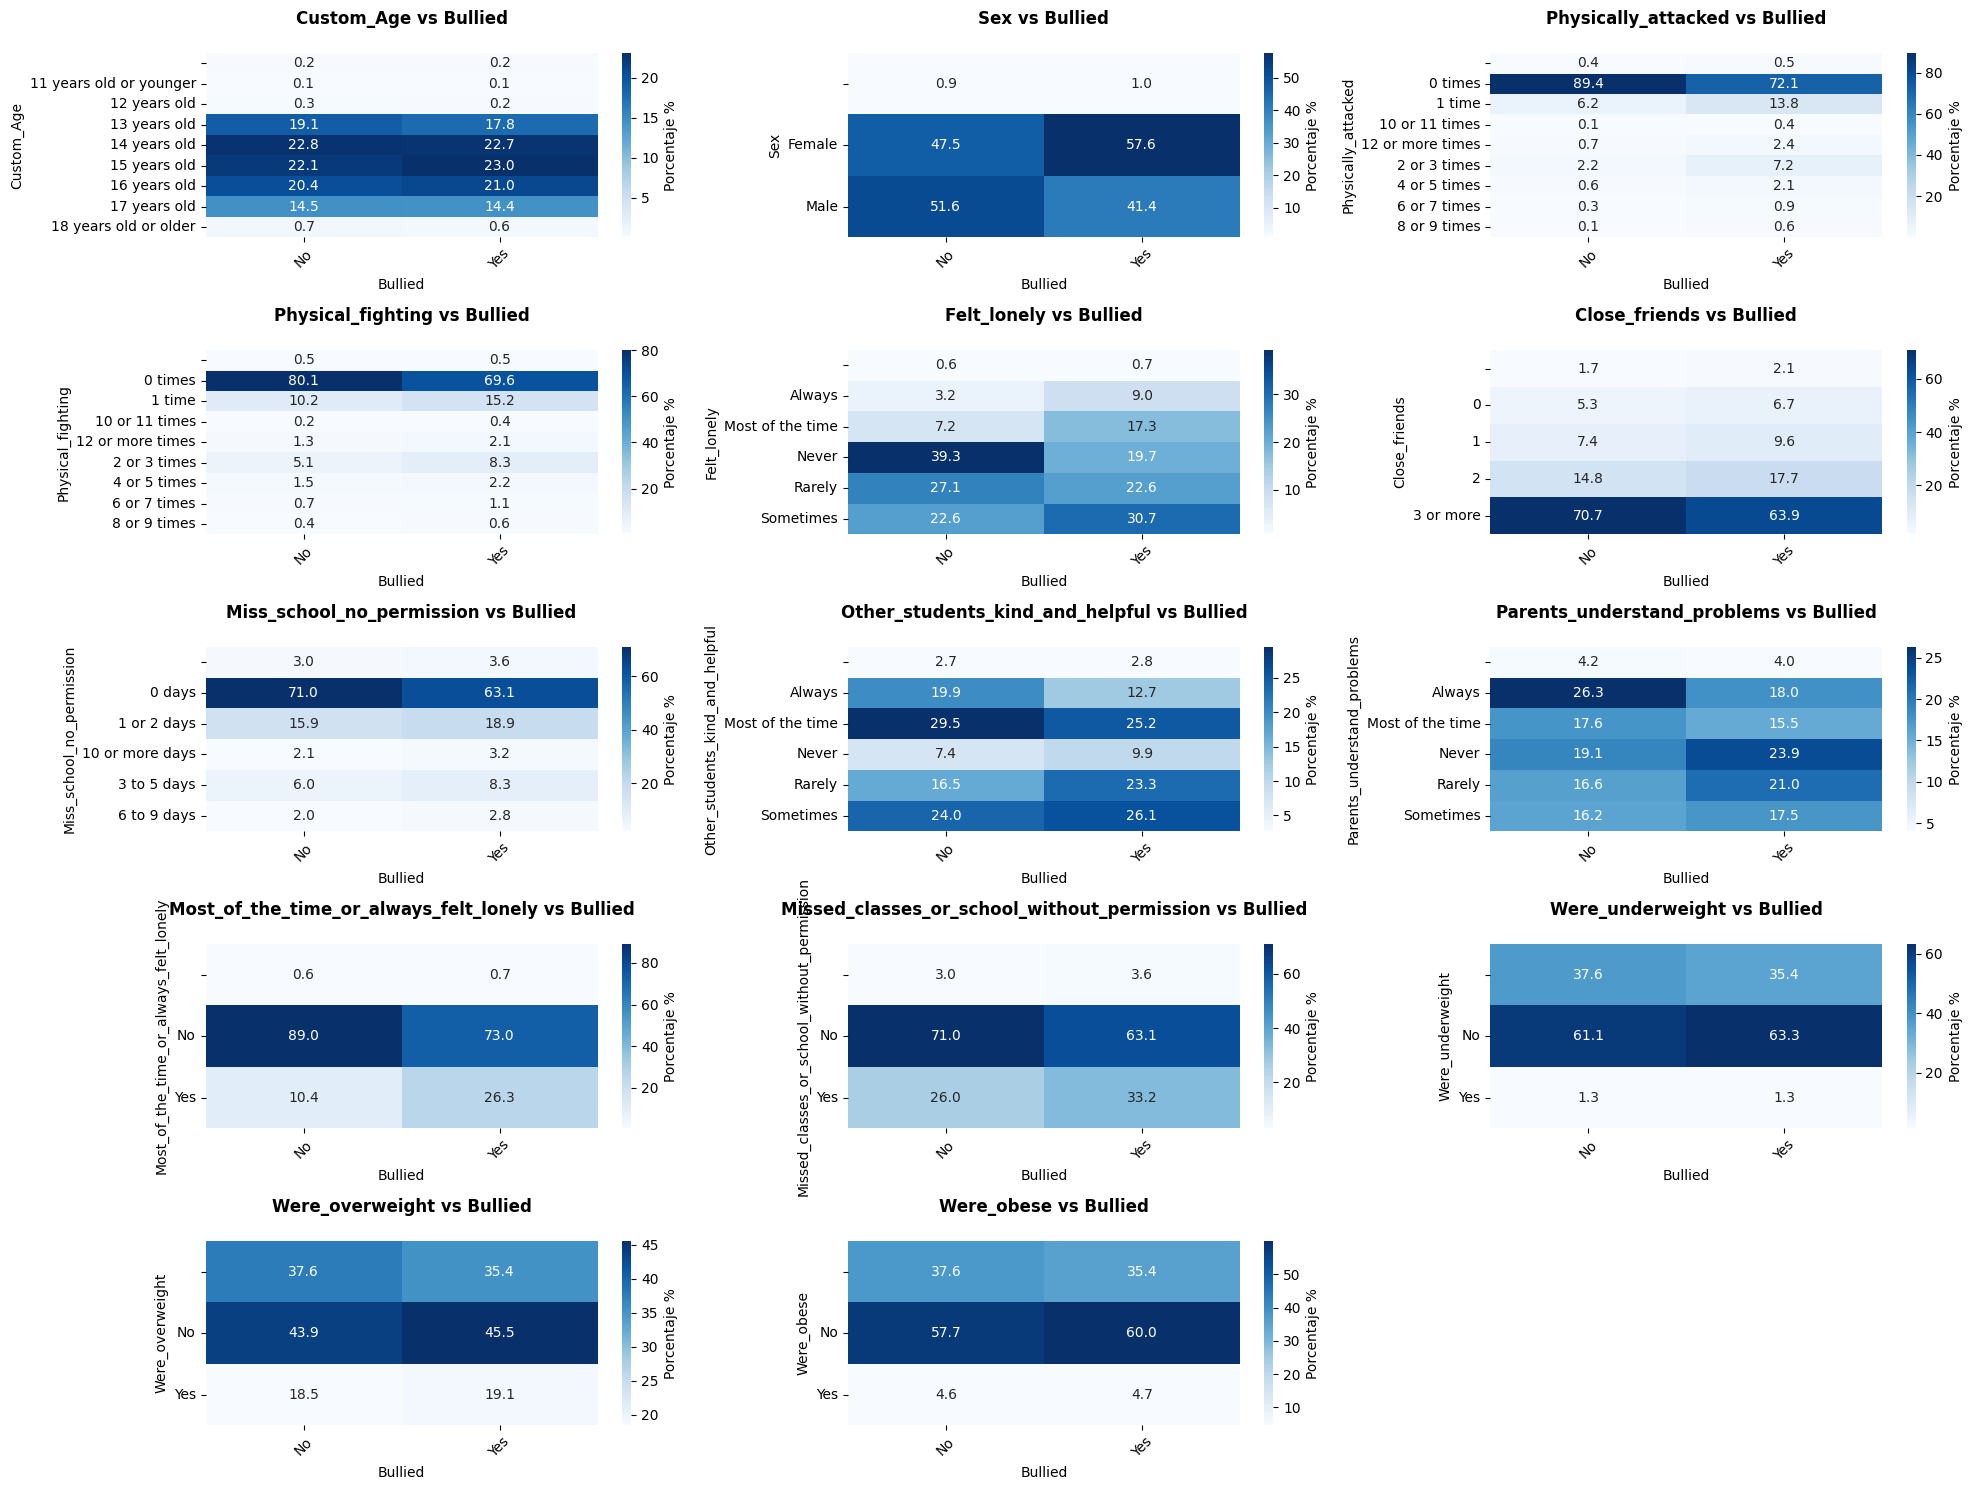

In [ ]:
create_heatmaps(
    tablas_normalizadas_columnas,
    variables_categoricas,
    "Bullied",
    color="Blues",
    figsize=(20, 15),
)

## Generación de Heatmaps con Tablas Normalizadas por Filas

Para analizar la distribución porcentual de bullying dentro de cada categoría de las variables predictoras, se generaron heatmaps utilizando las tablas normalizadas por filas obtenidas del proceso de creación de tablas de contingencia.

Esta visualización permite identificar qué categorías de cada variable presentan mayores porcentajes de víctimas de bullying, mostrando la probabilidad de ser afectado según las diferentes características analizadas.

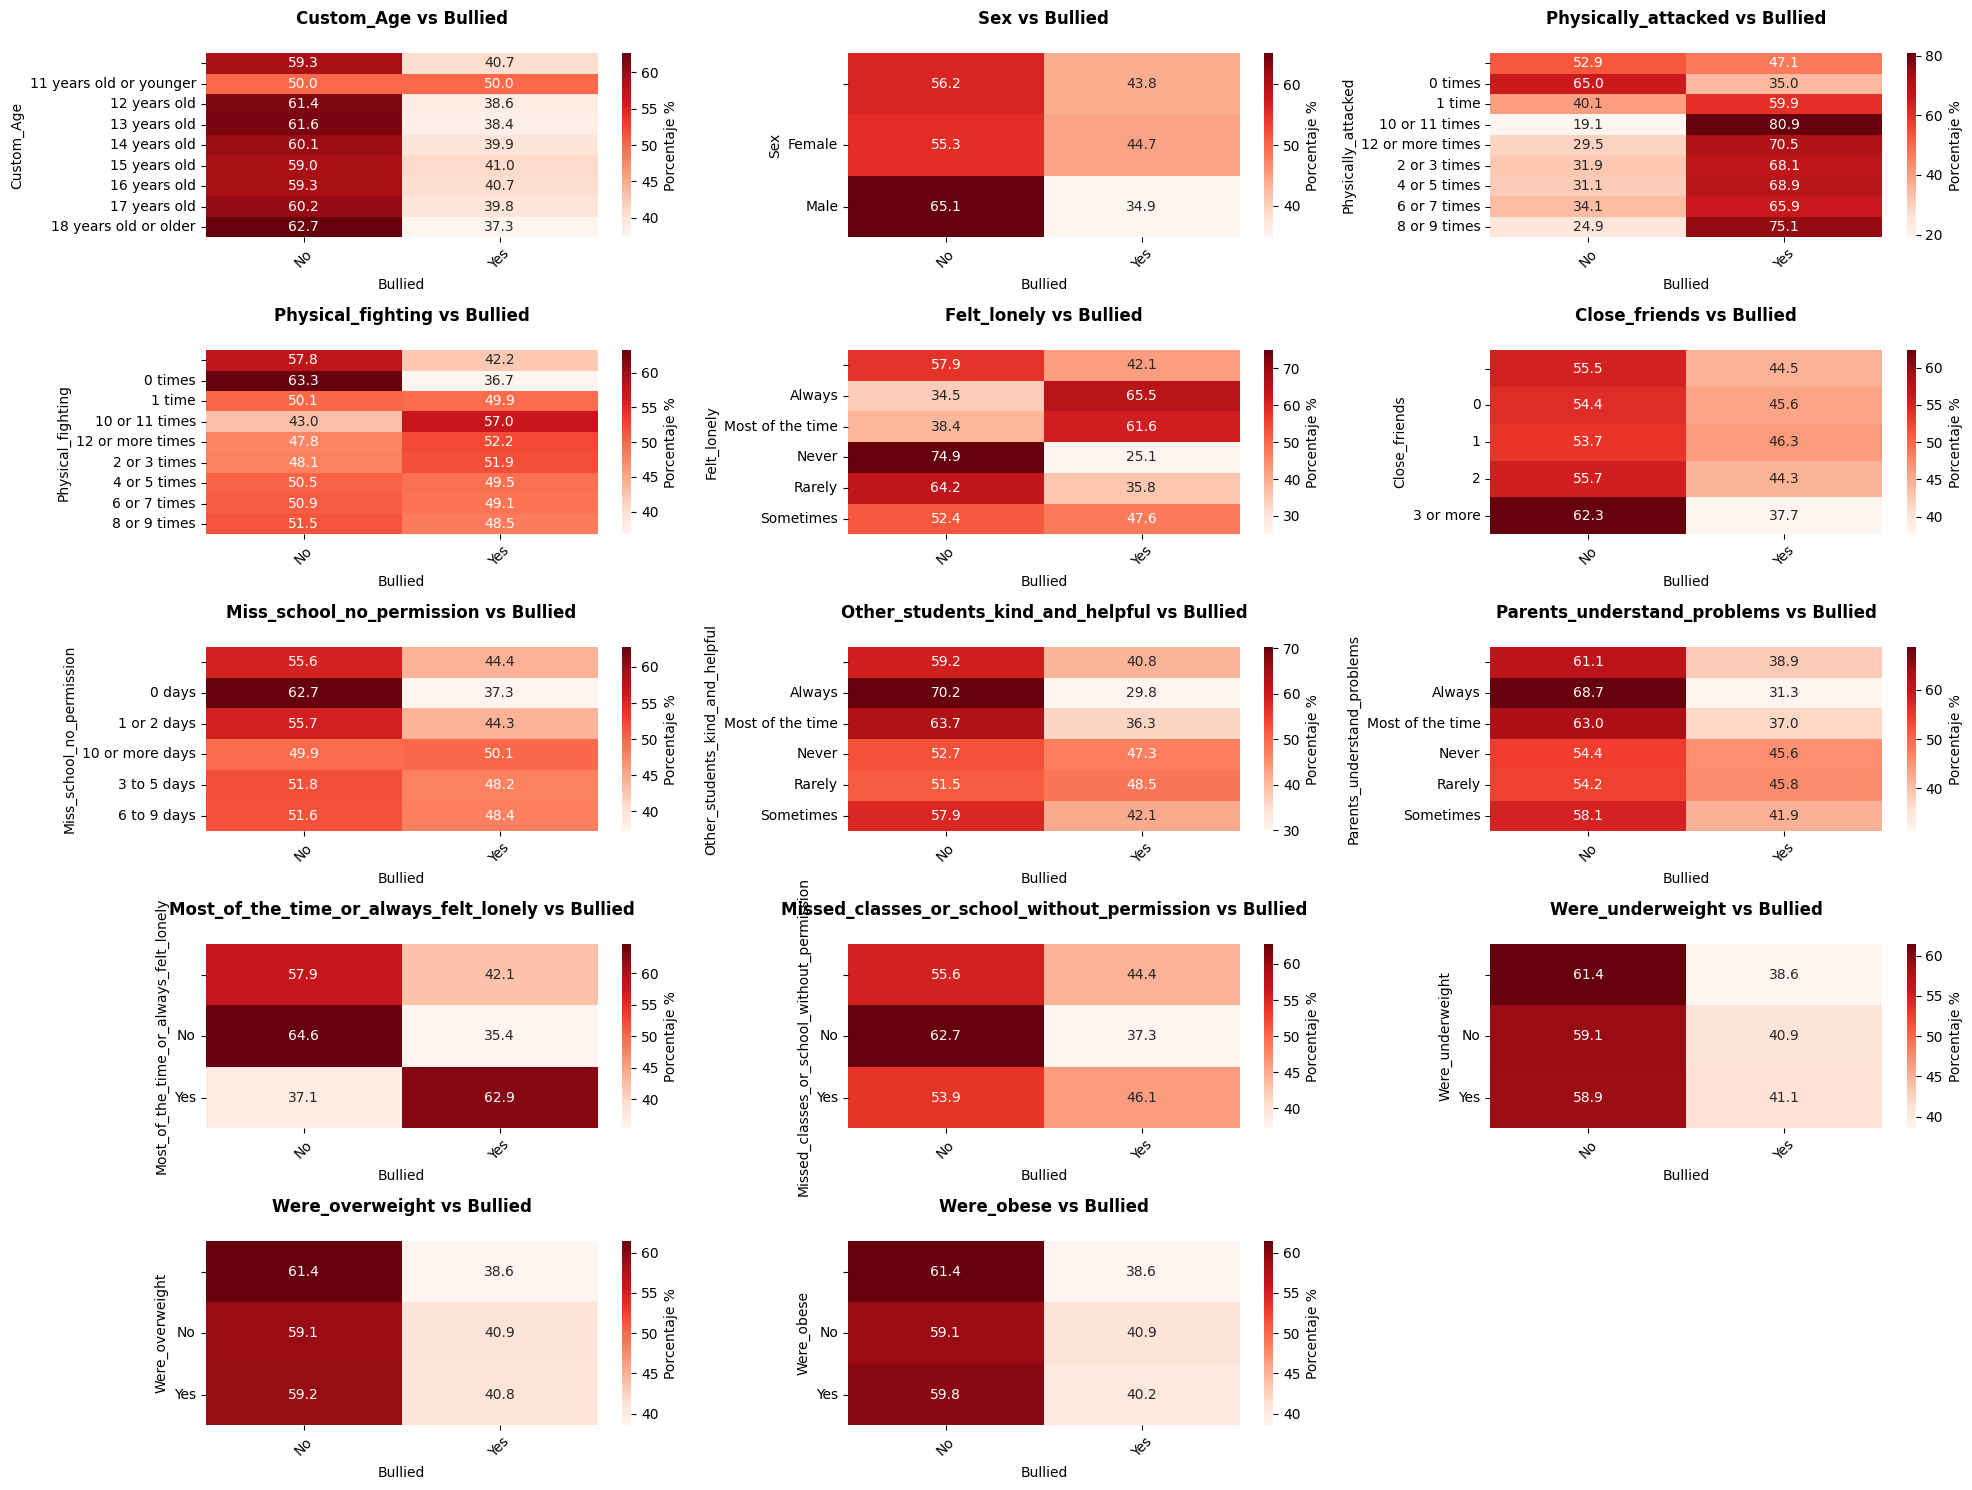

In [ ]:
create_heatmaps(
    tablas_normalizadas_filas,
    variables_categoricas,
    "Bullied",
    color="Reds",
    figsize=(20, 15)
)

## Conclusión del análisis

El análisis de las tablas de contingencia, complementado con visualizaciones mediante heatmaps, permitió identificar con mayor precisión las relaciones entre las variables predictoras y la ocurrencia de bullying.

En la visualización normalizada por columnas, las variables *Felt_lonely* y *Physically_attacked* concentraron los porcentajes más altos dentro del grupo de estudiantes que reportaron haber sido víctimas de bullying, reforzando los resultados obtenidos a través del estadístico Chi². Asimismo, la variable *Physical_fighting* evidenció un gradiente ascendente, donde la frecuencia de participación en peleas físicas se relacionó directamente con una mayor probabilidad de victimización.

Por su parte, los factores sociales —particularmente *Parents_understand_problems* y *Other_students_kind_and_helpful*— mostraron una asociación significativa. Los estudiantes que percibieron menor comprensión por parte de sus padres o escaso apoyo de sus compañeros presentaron tasas de bullying más elevadas. Este patrón se visualizó con claridad en los heatmaps normalizados por filas, los cuales destacaron la importancia del entorno emocional y social en la dinámica del acoso escolar.

En contraste, las variables asociadas al peso corporal (*Were_underweight*, *Were_overweight*, *Were_obese*) y la edad (*Custom_Age*) presentaron valores de Chi² considerablemente bajos, además de diferencias porcentuales mínimas entre categorías. Estos resultados confirman su escasa contribución al modelo y justifican su exclusión del conjunto final de predictores.

Finalmente, las visualizaciones facilitaron la detección de categorías incompletas y valores faltantes en diversas columnas, lo que sugiere posibles inconsistencias en la recolección de los datos y resalta la importancia de un control de calidad previo a la modelización.


# Eliminación de columnas y registros inconsistentes

En está etapa se eliminan las columnas que no aportan un peso significativo al modelo o directamente no son relevantes. Como también los registros que pueden causar ruido al modelo.

In [ ]:
# Eliminar registros inconsistentes
df = df[~df["Custom_Age"].isin(["11 years old or younger", "12 years old", "18 years old or older"])]

# Eliminar columnas que no aportan un peso significativo
df = df.drop(['record', 'Custom_Age', 'Were_underweight', 'Were_overweight', 'Were_obese'], axis=1)

print(df.shape)
df.head()

(56405, 14)


,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Bullied
0,Yes,Yes,,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,Yes
1,No,No,No,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No
2,No,No,No,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No
3,No,No,No,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No
4,No,No,No,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,No


# Detección de valores vacíos o con solo espacios

En esta etapa se busca identificar la cantidad exacta de valores vacíos dentro del dataset, esto con el fin de eliminarlas más adelante.  

Este tipo de valores son problemáticos porque pueden ser interpretados como texto válido cuando en realidad representan datos faltantes.  

In [ ]:
# Detectar celdas que son cadena vacía o solo espacios
espacios = df.map(lambda x: isinstance(x, str) and x.strip() == "")

# Contar espacios por columna
conteo_espacios = espacios.sum()

print(conteo_espacios)

Bullied_on_school_property_in_past_12_months        1219
Bullied_not_on_school_property_in_past_12_months     480
Cyber_bullied_in_past_12_months                      560
Sex                                                  524
Physically_attacked                                  238
Physical_fighting                                    267
Felt_lonely                                          358
Close_friends                                       1053
Miss_school_no_permission                           1842
Other_students_kind_and_helpful                     1541
Parents_understand_problems                         2348
Most_of_the_time_or_always_felt_lonely               358
Missed_classes_or_school_without_permission         1842
Bullied                                                0
dtype: int64


# Limpieza de filas con valores vacíos

Antes de aplicar transformaciones al dataset, es recomendable trabajar con una copia de seguridad para conservar los datos originales en caso de necesitar verificaciones posteriores.

En este paso se realiza una copia del DataFrame y se eliminan las filas con espacios en blanco.


In [ ]:
# Guarda una copia antes de realizar transformaciones
original_df = df.copy()

# Eliminar filas donde al menos una columna tenga espacios
df = df[~espacios.any(axis=1)]

print("Filas/Columnas:", df.shape)
df.head(20)

Filas/Columnas: (50324, 14)


,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Bullied
1,No,No,No,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No
2,No,No,No,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No
4,No,No,No,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,No
5,No,No,No,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No
6,No,No,No,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,No
8,No,No,No,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,No
9,Yes,No,No,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,Yes
10,No,No,No,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,No,Yes,No
11,Yes,Yes,Yes,Female,12 or more times,1 time,Sometimes,3 or more,0 days,Never,Always,No,No,Yes
12,No,No,No,Female,0 times,0 times,Sometimes,3 or more,0 days,Sometimes,Never,No,No,No


# Visualización de variables categóricas

Con el fin de explorar la distribución de las variables categóricas seleccionadas, se definió la función auxiliar `make_graphbar()`.  

Esta función permite recibir un DataFrame y una lista de columnas categóricas, generar gráficas de barras y organizar las gráficas automáticamente en un grid.

In [ ]:
def make_graphbar(df, columns, ncols=2, rotation=0, fontsize=9):

    n = len(columns)
    nrows = (n + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), squeeze=False)
    axs = axs.ravel()

    colors = plt.cm.tab20.colors  # Paleta de colores

    for i, col in enumerate(columns):
        ax = axs[i]
        conteo = df[col].fillna("(NA)").value_counts()
        total = conteo.sum()

        # Barras
        bars = ax.bar(conteo.index.astype(str), conteo.values, color=colors[:len(conteo)])

        # Anotaciones: valor absoluto + porcentaje, dentro de la barra
        for b, v in zip(bars, conteo.values):
            pct = v / total * 100 if total else 0
            text = f"{v}\n({pct:.1f}%)"

            # Coordenadas: centro de la barra en X, mitad de la altura en Y
            x = b.get_x() + b.get_width()/2
            y = v / 2

            # Contraste: si la barra es muy alta, poner texto en blanco
            color_texto = "white" if v > (total * 0.1) else "black"

            ax.text(x, y, text,
                    ha="center", va="center", fontsize=fontsize,
                    color=color_texto, fontweight="bold")

        ax.set_title(col.replace("_", " "), fontsize=fontsize+1)
        ax.set_ylabel("Frecuencia absoluta", fontsize=fontsize)
        ax.set_xticks(range(len(conteo.index)))
        ax.set_xticklabels(conteo.index.astype(str), rotation=rotation, ha="right", fontsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize)
        ax.grid(axis='y', linestyle=':', alpha=0.4)

    # Ocultar ejes sobrantes
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


# Distribución de las variables relacionadas con bullying

En este paso se grafican las frecuencias de las variables directamente asociadas al bullying en el dataset:

- Bullied_on_school_property_in_past_12_months - Bullying sufrido dentro de la escuela.  
- Bullied_not_on_school_property_in_past_12_months - Bullying sufrido fuera de la escuela.  
- Cyber_bullied_in_past_12_months - Ciberacoso.  
- Bullied - Variable consolidada creada previamente, que toma el valor "Yes" si el estudiante sufrió bullying en al menos uno de los tres contextos anteriores.

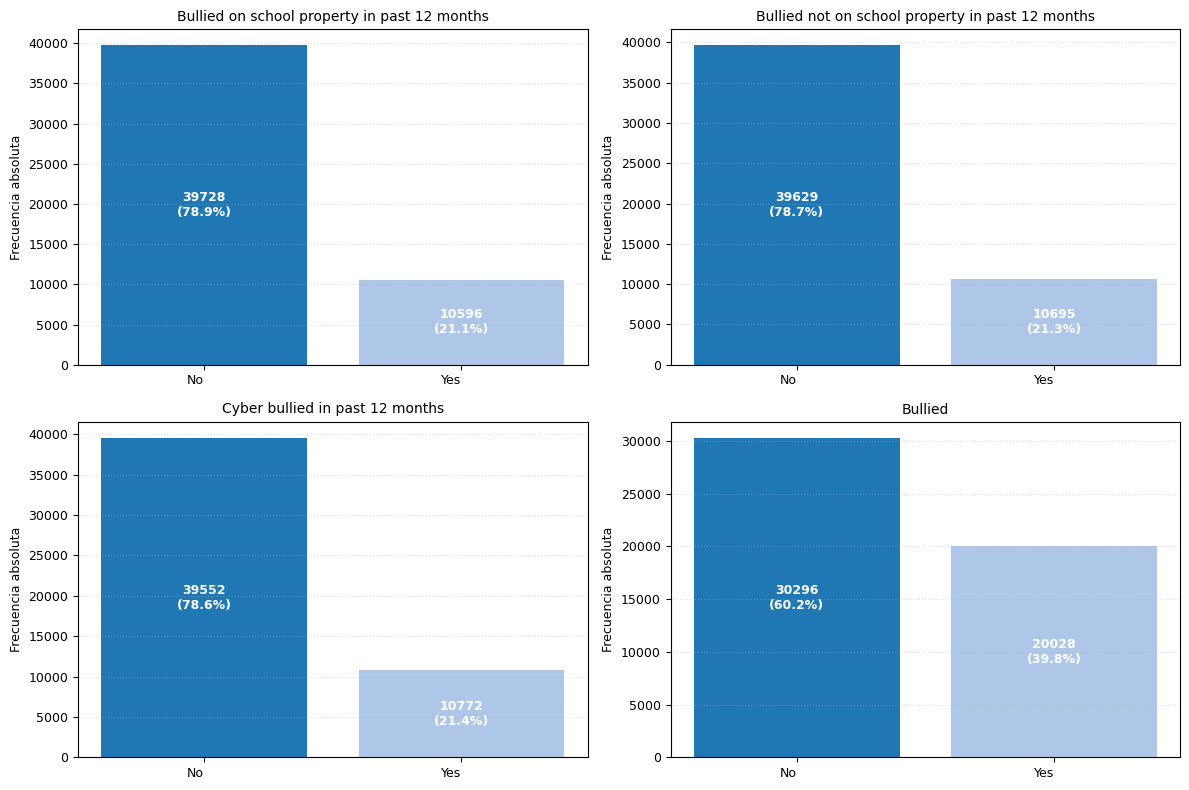

In [ ]:
make_graphbar(df, [
  "Bullied_on_school_property_in_past_12_months",
  "Bullied_not_on_school_property_in_past_12_months",
  "Cyber_bullied_in_past_12_months",
  "Bullied"
])

# Depuración inicial de variables

Se realizó una depuración de atributos con el objetivo de eliminar redundancias y preservar únicamente aquellos predictores con valor explicativo.

En este proceso se descartaron tres variables derivadas o poco informativas. En primer lugar, *Missed_classes_or_school_without_permission* fue eliminada por ser redundante respecto a *Miss_school_no_permission*, cuya estructura categórica ofrece mayor riqueza de información. Asimismo, se eliminó *Most_of_the_time_or_always_felt_lonely*, una simplificación binaria de *Felt_lonely*, conservando esta última al reflejar mejor la variabilidad de las respuestas.

Adicionalmente, se eliminaron las variables *Bullied_on_school_property_in_past_12_months*, *Bullied_not_on_school_property_in_past_12_months* y *Cyber_bullied_in_past_12_months*. Dichas variables fueron utilizadas para la construcción de la variable objetivo *Bullied*. Incluirlas en el conjunto de predictores introduciría un sesgo de *fuga de información (data leakage)*.


In [ ]:
df = df.drop(['Missed_classes_or_school_without_permission',
              'Most_of_the_time_or_always_felt_lonely',
              'Bullied_on_school_property_in_past_12_months',
              'Bullied_not_on_school_property_in_past_12_months',
              'Cyber_bullied_in_past_12_months'
         ], axis=1)

# Codificación de variables categóricas

Una vez completada la depuración inicial de variables irrelevantes y redundantes, se procedió a transformar las variables categóricas mediante la técnica de *One-Hot Encoding*. Para ello se utilizó la función `pd.get_dummies` de la librería *pandas*, la cual genera variables binarias para cada categoría de las variables cualitativas presentes en el dataset.


In [ ]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,Sex_Male,Physically_attacked_1 time,Physically_attacked_10 or 11 times,Physically_attacked_12 or more times,Physically_attacked_2 or 3 times,Physically_attacked_4 or 5 times,Physically_attacked_6 or 7 times,Physically_attacked_8 or 9 times,Physical_fighting_1 time,Physical_fighting_10 or 11 times,...,Miss_school_no_permission_6 to 9 days,Other_students_kind_and_helpful_Most of the time,Other_students_kind_and_helpful_Never,Other_students_kind_and_helpful_Rarely,Other_students_kind_and_helpful_Sometimes,Parents_understand_problems_Most of the time,Parents_understand_problems_Never,Parents_understand_problems_Rarely,Parents_understand_problems_Sometimes,Bullied_Yes
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
5,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Definición de variables predictoras y objetivo

Con el dataset ya depurado y transformado, el siguiente paso consistió en separar las variables independientes de la variable dependiente.  

- Variables predictoras: Se consideraron todas las demás columnas resultantes del proceso de codificación (*One-Hot Encoding*), excluyendo la variable objetivo.

- Variable objetivo: Se seleccionó *Bullied_Yes*, que representa si el estudiante reportó haber sido víctima de bullying.



In [ ]:
X = df.drop('Bullied_Yes', axis=1)
y = df['Bullied_Yes']

X.head()

,Sex_Male,Physically_attacked_1 time,Physically_attacked_10 or 11 times,Physically_attacked_12 or more times,Physically_attacked_2 or 3 times,Physically_attacked_4 or 5 times,Physically_attacked_6 or 7 times,Physically_attacked_8 or 9 times,Physical_fighting_1 time,Physical_fighting_10 or 11 times,...,Miss_school_no_permission_3 to 5 days,Miss_school_no_permission_6 to 9 days,Other_students_kind_and_helpful_Most of the time,Other_students_kind_and_helpful_Never,Other_students_kind_and_helpful_Rarely,Other_students_kind_and_helpful_Sometimes,Parents_understand_problems_Most of the time,Parents_understand_problems_Never,Parents_understand_problems_Rarely,Parents_understand_problems_Sometimes
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
5,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
y.head()

,Bullied_Yes
1,False
2,False
4,False
5,False
6,False


# Creación y evaluación del modelo de regresión logística

Con el dataset ya depurado y transformado, se procedió a la construcción de un modelo de *regresión logística* con el propósito de estimar la probabilidad de que un estudiante haya sido víctima de bullying a partir de los factores seleccionados.

Para garantizar la validez de los resultados, el conjunto de datos se dividió en subconjuntos de entrenamiento y prueba, lo cual permitió evaluar la capacidad de generalización del modelo. El entrenamiento se llevó a cabo sobre el primer subconjunto, mientras que el segundo se destinó exclusivamente a la validación.

La evaluación del clasificador se realizó a través de un conjunto de métricas ampliamente utilizadas en problemas de clasificación: *exactitud, precisión, sensibilidad, F1-score y el área bajo la curva ROC (AUC)*.

Con el objetivo de estructurar y sistematizar el procedimiento, todo el proceso de entrenamiento y evaluación fue encapsulado en funciones.


In [ ]:
def create_and_evaluate_model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
  )

  model = LogisticRegression(
    max_iter=2000,          # Número de iteraciones (asegura convergencia)
    class_weight="balanced" # Ajusta pesos automáticamente según clases
  )

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para ROC/AUC

  print("Accuracy :", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall   :", recall_score(y_test, y_pred))
  print("F1-score :", f1_score(y_test, y_pred))
  print("AUC      :", roc_auc_score(y_test, y_prob))

  # Reporte detallado
  print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

  return y_pred, y_prob, y_test, model


In [ ]:
def create_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=["No Bullying", "Bullying"],
              yticklabels=["No Bullying", "Bullying"])
  plt.xlabel("Predicción")
  plt.ylabel("Real")
  plt.title("Matriz de confusión")
  plt.show()


In [ ]:
def create_roc_curve(y_test, y_prob):
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_prob))
  plt.plot([0, 1], [0, 1], "k--")  # línea base
  plt.xlabel("Tasa de falsos positivos (FPR)")
  plt.ylabel("Tasa de verdaderos positivos (TPR)")
  plt.title("Curva ROC")
  plt.legend(loc="lower right")
  plt.show()


# Ejecución del modelo

Una vez definida la función para la creación y evaluación del clasificador, se procedió a su ejecución sobre las variables predictoras y la variable objetivo previamente establecidas.  

Este paso permitió entrenar el modelo de regresión logística con el conjunto de entrenamiento y obtener, a partir del conjunto de prueba, las métricas de desempeño correspondientes.

In [ ]:
y_pred, y_prob, y_test, model = create_and_evaluate_model(X, y)

Accuracy : 0.6541480377545952
Precision: 0.5583722481654436
Recall   : 0.6268097853220169
F1-score : 0.5906150770316358
AUC      : 0.7027962347615728

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.73      0.67      0.70      6059
        True       0.56      0.63      0.59      4006

    accuracy                           0.65     10065
   macro avg       0.64      0.65      0.65     10065
weighted avg       0.66      0.65      0.66     10065



# Análisis de la matriz de confusión

Con el fin de comprender de manera más detallada el desempeño del modelo, se generó la matriz de confusión, la cual muestra la distribución de aciertos y errores en las predicciones.

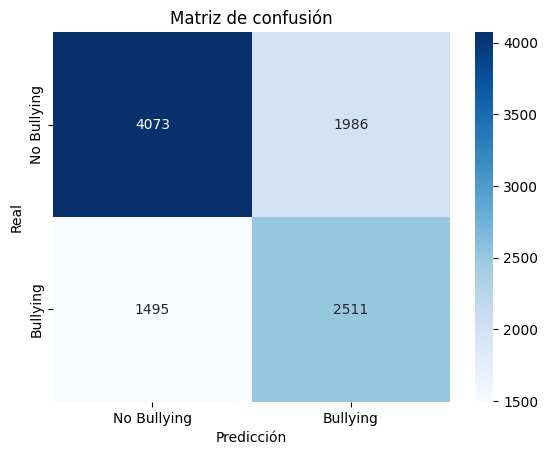

In [ ]:
create_confusion_matrix(y_test, y_pred)

# Curva ROC y área bajo la curva (AUC)

Para complementar la evaluación del modelo, se construyó la curva ROC (Receiver Operating Characteristic). Esta curva representa la relación entre la tasa de verdaderos positivos (TPR o sensibilidad) y la tasa de falsos positivos (FPR) en distintos umbrales de decisión.

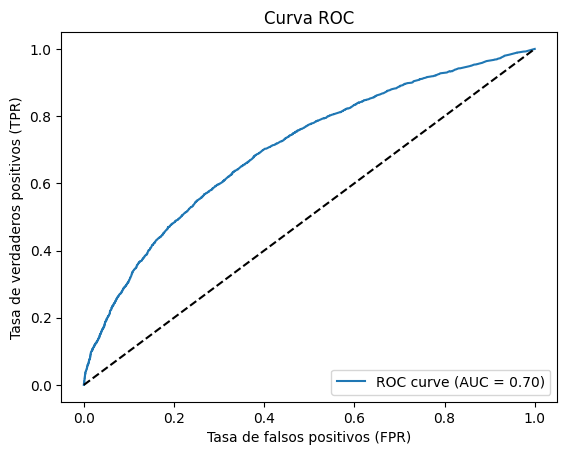

In [ ]:
create_roc_curve(y_test, y_prob)

## Conclusión del modelo de regresión logística

El modelo de regresión logística alcanzó un accuracy de aproximadamente 65.4%, lo que indica que, en términos generales, cerca de dos de cada tres predicciones fueron correctas. No obstante, dado el contexto del estudio, resulta más relevante analizar el equilibrio entre precisión y sensibilidad, especialmente en la detección de casos positivos de bullying.

La precisión obtenida en la clase positiva (≈0.56) muestra que, de todos los estudiantes identificados como víctimas de bullying por el modelo, un poco más de la mitad efectivamente lo eran. Por su parte, la sensibilidad (≈0.63) refleja que el modelo logró reconocer a seis de cada diez estudiantes que realmente habían reportado bullying. El F1-score (≈0.59) confirma un desempeño moderado en la detección de casos positivos, coherente con la ligera presencia de desbalance en las clases observadas.

El valor de AUC (≈0.70) evidencia que el modelo posee una capacidad de discriminación aceptable entre estudiantes víctimas y no víctimas de bullying, aunque aún lejos de un clasificador altamente robusto. En términos prácticos, el modelo supera claramente al azar (AUC = 0.5), pero todavía puede ser optimizado mediante una mejor selección de variables y/o la exploración de algoritmos más complejos.

En síntesis, el modelo constituye un punto de partida válido para la predicción de bullying, mostrando un desempeño razonable y un equilibrio adecuado entre sensibilidad y precisión. Sin embargo, los resultados sugieren la necesidad de implementar mejoras metodológicas que fortalezcan la capacidad predictiva y reduzcan el riesgo de falsos negativos, dado el impacto que implica no identificar correctamente a estudiantes en situación de vulnerabilidad.


# Análisis de los coeficientes de la regresión logística

La regresión logística los coeficientes se interpretan en términos de log-odds (logaritmo de la razón de probabilidades):

- Un coeficiente positivo indica que, a medida que aumenta el valor de la variable independiente, también se incrementan los log-odds de pertenecer a la clase positiva.
- Un coeficiente negativo señala una relación inversa: a medida que la variable independiente crece, los log-odds disminuyen, reduciendo la probabilidad de pertenecer a la clase positiva.  

Para facilitar su interpretación práctica, los coeficientes pueden transformarse exponencialmente (exp(coef)) a odds ratios. Un odds ratio mayor que 1 implica un aumento en la probabilidad asociada a la variable, mientras que un valor menor que 1 refleja una disminución.


In [ ]:
print(model.coef_)      # Coeficientes asociados a cada variable independiente
print(model.intercept_) # Intercepto del modelo logístico


[[-0.30661434  0.85293282  1.52689125  1.19429157  1.16604956  1.11205259
   1.00408287  1.38743016  0.39737443  0.53879803  0.36526136  0.38824322
   0.28457546  0.37929867  0.27818668 -0.07753421 -1.35426392 -0.93588007
  -0.50166361  0.11233144  0.04863993  0.02948928  0.15690645  0.29341198
   0.22797651  0.16680624  0.17406789  0.46557026  0.43433997  0.31253211
   0.07341517  0.00948383  0.11870162  0.09188524]]
[0.25896394]
